<a href="https://colab.research.google.com/github/probml/pyprobml/blob/master/book1/intro/data_munging.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data visualization and preprocessing using  pandas and sklearn


Before trying to fit a model, it is a good idea to perform exploratory data analysis, which usually means "looking at the data" in various ways, both visually and numerically. We then often pre-process it before feeding into an ML model.
We give some examples below.

### Install necessary libraries




In [2]:
# Standard Python libraries
from __future__ import absolute_import, division, print_function, unicode_literals

import os
import time
import numpy as np
import glob
import matplotlib.pyplot as plt
import PIL
import imageio

from IPython import display

import sklearn

import seaborn as sns;
sns.set(style="ticks", color_codes=True)

import pandas as pd
pd.set_option('precision', 2) # 2 decimal places
pd.set_option('display.max_rows', 20)
pd.set_option('display.max_columns', 30)
pd.set_option('display.width', 100) # wide windows



### Auto-mpg dataset <a class="anchor" id="EDA-autompg"></a>

In [3]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Year', 'Origin', 'Name']
df = pd.read_csv(url, names=column_names, sep='\s+', na_values="?")

# The last column (name) is a unique id for the car, so we drop it
df = df.drop(columns=['Name'])

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Year          398 non-null    int64  
 7   Origin        398 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 25.0 KB


We notice that there are only 392 horsepower rows, but 398 of the others.
This is because the HP column has 6 **missing values** (also called NA, or
not available).
There are 3 main ways to deal with this:
- Drop the rows with any missing values using dropna()
- Drop any columns with any missing values using drop()
- Replace the missing vales with some other valye (eg the median) using fillna. (This is called missing value imputation.)
For simplicity, we adopt the first approach.


In [4]:
# Ensure same number of rows for all features.
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           392 non-null    float64
 1   Cylinders     392 non-null    int64  
 2   Displacement  392 non-null    float64
 3   Horsepower    392 non-null    float64
 4   Weight        392 non-null    float64
 5   Acceleration  392 non-null    float64
 6   Year          392 non-null    int64  
 7   Origin        392 non-null    int64  
dtypes: float64(5), int64(3)
memory usage: 27.6 KB


In [5]:
# Summary statistics
df.describe(include='all')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
count,392.00,392.00,392.00,392.00,392.00,392.00,392.00,392.00
mean,23.45,5.47,194.41,104.47,2977.58,15.54,75.98,1.58
std,7.81,1.71,104.64,38.49,849.40,2.76,3.68,0.81
min,9.00,3.00,68.00,46.00,1613.00,8.00,70.00,1.00
25%,17.00,4.00,105.00,75.00,2225.25,13.78,73.00,1.00
50%,22.75,4.00,151.00,93.50,2803.50,15.50,76.00,1.00
75%,29.00,8.00,275.75,126.00,3614.75,17.02,79.00,2.00
max,46.60,8.00,455.00,230.00,5140.00,24.80,82.00,3.00


In [6]:
# Convert Origin feature from int to categorical factor
df['Origin'] = df.Origin.replace([1,2,3],['USA','Europe','Japan'])
df['Origin'] = df['Origin'].astype('category')

# Let us check the categories (levels)
print(df['Origin'].cat.categories)

# Let us check the datatypes of all the features
print(df.dtypes)

Index(['Europe', 'Japan', 'USA'], dtype='object')
MPG              float64
Cylinders          int64
Displacement     float64
Horsepower       float64
Weight           float64
Acceleration     float64
Year               int64
Origin          category
dtype: object


In [7]:
# Let us inspect the data. We see meaningful names for Origin.
df.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA


In [8]:
# Create latex table from first 5 rows 
tbl = df[-5:].to_latex(index=False, escape=False)
print(tbl)

\begin{tabular}{rrrrrrrl}
\toprule
  MPG &  Cylinders &  Displacement &  Horsepower &  Weight &  Acceleration &  Year &  Origin \\
\midrule
 27.0 &          4 &         140.0 &        86.0 &  2790.0 &          15.6 &    82 &     USA \\
 44.0 &          4 &          97.0 &        52.0 &  2130.0 &          24.6 &    82 &  Europe \\
 32.0 &          4 &         135.0 &        84.0 &  2295.0 &          11.6 &    82 &     USA \\
 28.0 &          4 &         120.0 &        79.0 &  2625.0 &          18.6 &    82 &     USA \\
 31.0 &          4 &         119.0 &        82.0 &  2720.0 &          19.4 &    82 &     USA \\
\bottomrule
\end{tabular}



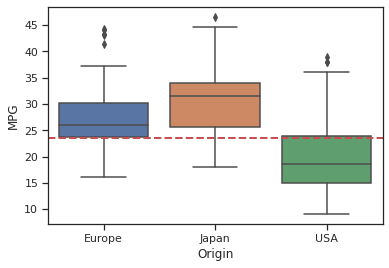

In [9]:
# Plot mpg distribution for cars from different countries of origin
data = pd.concat( [df['MPG'], df['Origin']], axis=1)
fig, ax = plt.subplots()
ax = sns.boxplot(x='Origin', y='MPG', data=data)
ax.axhline(data.MPG.mean(), color='r', linestyle='dashed', linewidth=2)
#plt.savefig(os.path.join(figdir, 'auto-mpg-origin-boxplot.pdf'))
plt.show()

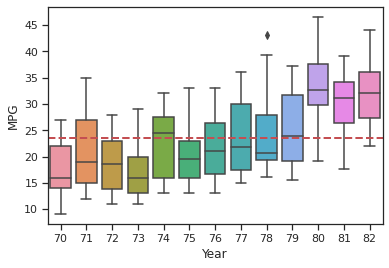

In [10]:
# Plot mpg distribution for cars from different years
data = pd.concat( [df['MPG'], df['Year']], axis=1)
fig, ax = plt.subplots()
ax = sns.boxplot(x='Year', y='MPG', data=data)
ax.axhline(data.MPG.mean(), color='r', linestyle='dashed', linewidth=2)
#plt.savefig(os.path.join(figdir, 'auto-mpg-year-boxplot.pdf'))
plt.show()

### Iris dataset <a class="anchor" id="EDA-iris"></a>

In [11]:
# Get the iris dataset and look at it
from sklearn.datasets import load_iris
iris = load_iris()
# show attributes of this object
print(dir(iris))

# Extract numpy arrays
X = iris.data 
y = iris.target
print(np.shape(X)) # (150, 4)
print(np.c_[X[0:3,:], y[0:3]]) # concatenate columns

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']
(150, 4)
[[5.1 3.5 1.4 0.2 0. ]
 [4.9 3.  1.4 0.2 0. ]
 [4.7 3.2 1.3 0.2 0. ]]


In [12]:
# The data is sorted by class. Let's shuffle the rows.
N = np.shape(X)[0]
rng = np.random.RandomState(42)
perm = rng.permutation(N)
X = X[perm]
y = y[perm]
print(np.c_[X[0:3,:], y[0:3]])

[[6.1 2.8 4.7 1.2 1. ]
 [5.7 3.8 1.7 0.3 0. ]
 [7.7 2.6 6.9 2.3 2. ]]


In [13]:
# Convert to pandas dataframe 
df = pd.DataFrame(data=X, columns=['sl', 'sw', 'pl', 'pw'])
# create column for labels
df['label'] = pd.Series(iris.target_names[y], dtype='category')

# Summary statistics
df.describe(include='all')

,sl,sw,pl,pw,label
count,150.00,150.00,150.00,150.00,150
unique,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,virginica
freq,NaN,NaN,NaN,NaN,50
mean,5.84,3.06,3.76,1.20,NaN
std,0.83,0.44,1.77,0.76,NaN
min,4.30,2.00,1.00,0.10,NaN
25%,5.10,2.80,1.60,0.30,NaN
50%,5.80,3.00,4.35,1.30,NaN
75%,6.40,3.30,5.10,1.80,NaN


In [14]:
# Peak at the data
df.head()

,sl,sw,pl,pw,label
0,6.1,2.8,4.7,1.2,versicolor
1,5.7,3.8,1.7,0.3,setosa
2,7.7,2.6,6.9,2.3,virginica
3,6.0,2.9,4.5,1.5,versicolor
4,6.8,2.8,4.8,1.4,versicolor


In [15]:
# Create latex table from first 5 rows 
tbl = df[:6].to_latex(index=False, escape=False)
print(tbl)

\begin{tabular}{rrrrl}
\toprule
  sl &   sw &   pl &   pw &       label \\
\midrule
 6.1 &  2.8 &  4.7 &  1.2 &  versicolor \\
 5.7 &  3.8 &  1.7 &  0.3 &      setosa \\
 7.7 &  2.6 &  6.9 &  2.3 &   virginica \\
 6.0 &  2.9 &  4.5 &  1.5 &  versicolor \\
 6.8 &  2.8 &  4.8 &  1.4 &  versicolor \\
 5.4 &  3.4 &  1.5 &  0.4 &      setosa \\
\bottomrule
\end{tabular}



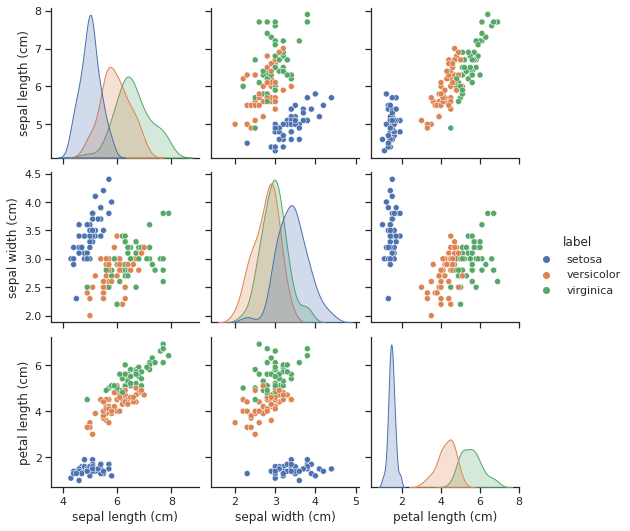

In [16]:
# 2d scatterplot
#https://seaborn.pydata.org/generated/seaborn.pairplot.html
import seaborn as sns;
sns.set(style="ticks", color_codes=True)
# Make a dataframe with nicer labels for printing
#iris_df = sns.load_dataset("iris")
iris_df = df.copy()
iris_df.columns = iris['feature_names'] + ['label'] 
g = sns.pairplot(iris_df, vars = iris_df.columns[0:3] , hue="label")
#save_fig("iris-scatterplot.pdf")
plt.show()

### Boston housing dataset <a class="anchor" id="EDA-boston"></a>

In [17]:
# Load data (creates numpy arrays)
boston = sklearn.datasets.load_boston()
X = boston.data
y = boston.target

# Convert to Pandas format
df = pd.DataFrame(X)
df.columns = boston.feature_names
df['MEDV'] = y.tolist()

df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,5.06e+02,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00,506.00
mean,3.61e+00,11.36,11.14,0.07,0.55,6.28,68.57,3.80,9.55,408.24,18.46,356.67,12.65,22.53
std,8.60e+00,23.32,6.86,0.25,0.12,0.70,28.15,2.11,8.71,168.54,2.16,91.29,7.14,9.20
min,6.32e-03,0.00,0.46,0.00,0.39,3.56,2.90,1.13,1.00,187.00,12.60,0.32,1.73,5.00
25%,8.20e-02,0.00,5.19,0.00,0.45,5.89,45.02,2.10,4.00,279.00,17.40,375.38,6.95,17.02
50%,2.57e-01,0.00,9.69,0.00,0.54,6.21,77.50,3.21,5.00,330.00,19.05,391.44,11.36,21.20
75%,3.68e+00,12.50,18.10,0.00,0.62,6.62,94.07,5.19,24.00,666.00,20.20,396.23,16.96,25.00
max,8.90e+01,100.00,27.74,1.00,0.87,8.78,100.00,12.13,24.00,711.00,22.00,396.90,37.97,50.00


<Figure size 432x288 with 0 Axes>

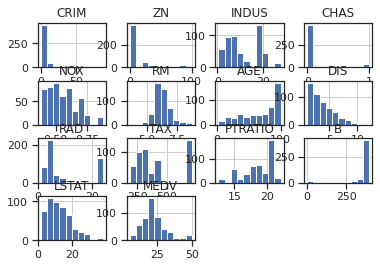

In [19]:
# plot marginal histograms of each column (13 features, 1 response)
plt.figure()
df.hist()
plt.show()

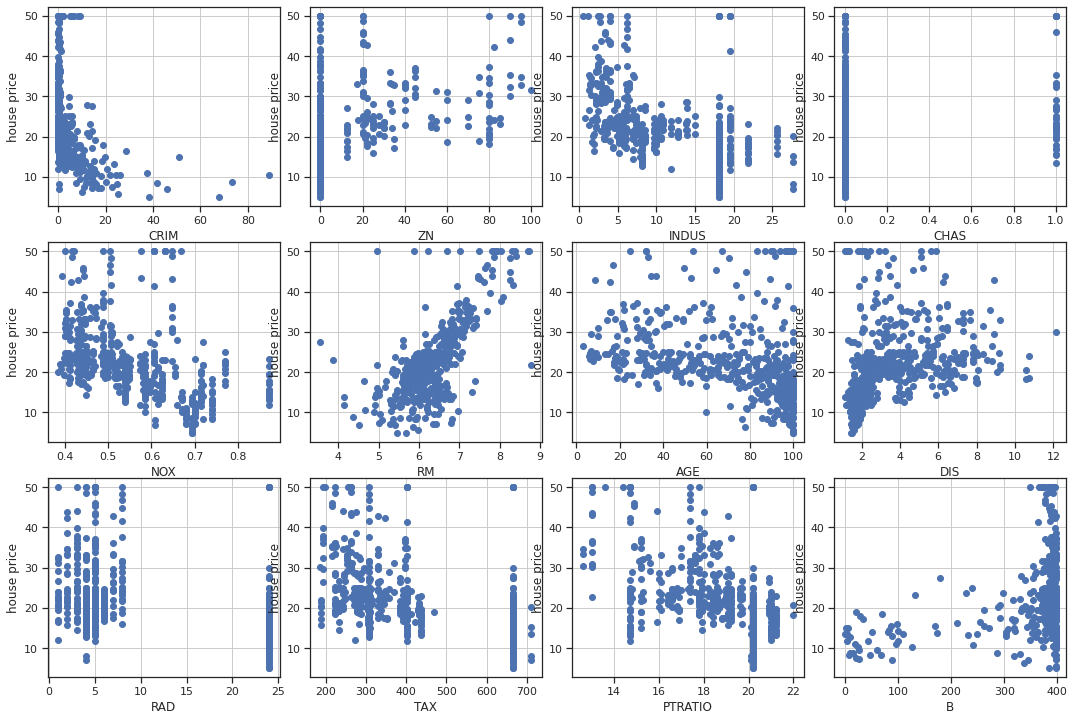

In [20]:
# scatter plot of response vs each feature 
nrows = 3; ncols = 4;
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize=[15, 10])
plt.tight_layout()
plt.clf()
for i in range(0,12):
    plt.subplot(nrows, ncols, i+1)
    plt.scatter(X[:,i], y)
    plt.xlabel(boston.feature_names[i])
    plt.ylabel("house price")
    plt.grid()
#save_fig("boston-housing-scatter.pdf")
plt.show()


## Data preprocessing <a class="anchor" id="preprocess"></a>

We often have to preprocess data before feeding it to an ML model. 
We give some examples below.

### Standardizing numeric features in Boston housing <a class="anchor" id="preprocess-boston"></a>

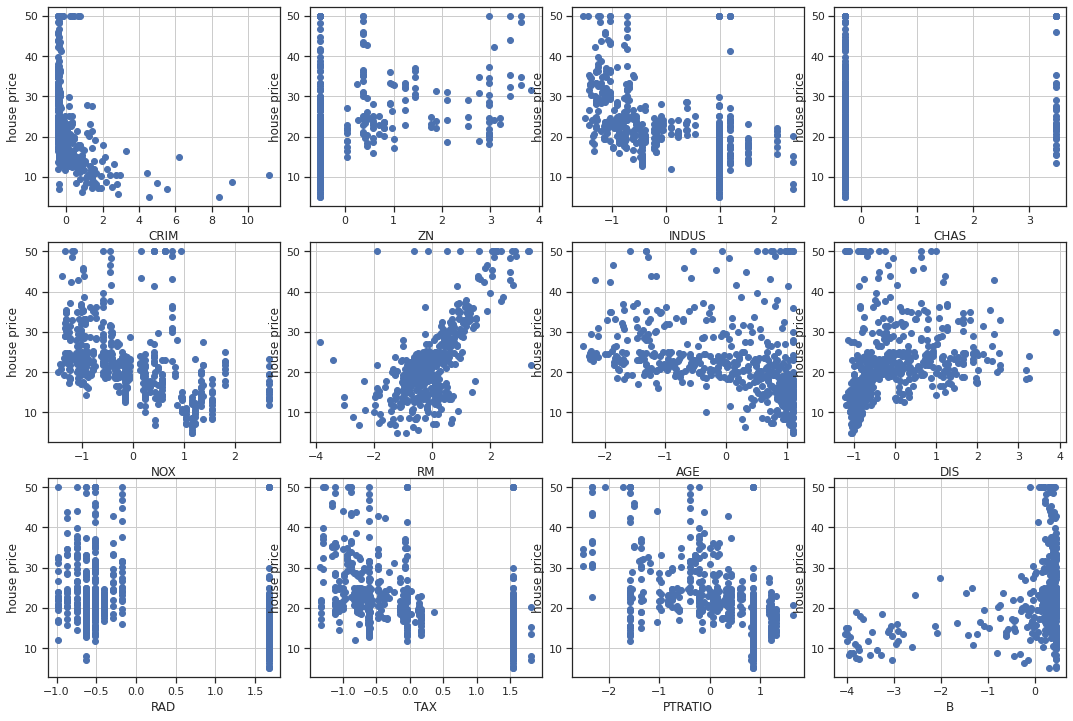

In [21]:
import sklearn.datasets
import sklearn.linear_model as lm
from sklearn.model_selection import train_test_split


boston = sklearn.datasets.load_boston()
X = boston.data
y = boston.target

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

scaler = sklearn.preprocessing.StandardScaler()
scaler = scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_scaled = scaler.transform(X) # entire dataset

# scatter plot of response vs each feature.
# The shape of the data looks the same as the unscaled case, but the x-axis of each feature is changed.
nrows = 3; ncols = 4;
fig, ax = plt.subplots(nrows=nrows, ncols=ncols, sharey=True, figsize=[15,10])
plt.tight_layout()
plt.clf()
for i in range(0,12):
    plt.subplot(nrows, ncols, i+1)
    plt.scatter(X_scaled[:,i], y)
    plt.xlabel(boston.feature_names[i])
    plt.ylabel("house price")
    plt.grid()
#save_fig("boston-housing-scatter-scaled.pdf")
plt.show()

### One-hot encoding for Autompg <a class="anchor" id="preprocess-onehot"></a>

In [22]:
# Get data 
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data'
column_names = ['MPG','Cylinders','Displacement','Horsepower','Weight',
                'Acceleration', 'Year', 'Origin', 'Name']
df = pd.read_csv(url, names=column_names, sep='\s+', na_values="?")

# The last column (name) is a unique id for the car, so we drop it
df = df.drop(columns=['Name'])

# Ensure same number of rows for all features.
df = df.dropna()

# Convert origin integer to categorical factor
df['Origin'] = df.Origin.replace([1,2,3],['USA','Europe','Japan'])
df['Origin'] = df['Origin'].astype('category')


df.info()

df.tail()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 392 entries, 0 to 397
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   MPG           392 non-null    float64 
 1   Cylinders     392 non-null    int64   
 2   Displacement  392 non-null    float64 
 3   Horsepower    392 non-null    float64 
 4   Weight        392 non-null    float64 
 5   Acceleration  392 non-null    float64 
 6   Year          392 non-null    int64   
 7   Origin        392 non-null    category
dtypes: category(1), float64(5), int64(2)
memory usage: 25.0 KB


,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin
393,27.0,4,140.0,86.0,2790.0,15.6,82,USA
394,44.0,4,97.0,52.0,2130.0,24.6,82,Europe
395,32.0,4,135.0,84.0,2295.0,11.6,82,USA
396,28.0,4,120.0,79.0,2625.0,18.6,82,USA
397,31.0,4,119.0,82.0,2720.0,19.4,82,USA


In [23]:
# Convert origin factor to integer
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
origin_cat = df['Origin']

print('before transform')
print(origin_cat)

origin_int = encoder.fit_transform(origin_cat)
print('after transform')
print(origin_int)

# Make sure we can decode back to strings
print('class names are {}'.format(encoder.classes_))
origin_cat2 = encoder.inverse_transform(origin_int)
print(origin_cat2)

before transform
0         USA
1         USA
2         USA
3         USA
4         USA
        ...  
393       USA
394    Europe
395       USA
396       USA
397       USA
Name: Origin, Length: 392, dtype: category
Categories (3, object): ['Europe', 'Japan', 'USA']
after transform
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 0 0 0 0 0 2 2 2 2 2 1 2 1 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 1 1 0 2 1 2 0 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2
 2 0 0 0 0 2 1 1 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 2 2 2 2 1 2 1 1
 2 2 0 2 2 0 0 0 0 2 0 1 2 2 2 2 1 2 1 2 2 2 2 2 2 2 2 2 0 0 0 1 1 2 0 0 1
 1 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 2 2 2 1 0 1 2 0 2 0 0 0 0 1 0 0 2 2 0
 2 2 2 2 2 2 2 2 2 2 0 1 2 2 2 2 0 1 1 2 0 2 0 1 0 2 2 2 2 1 2 0 2 1 2 2 2
 2 2 2 2 2 2 2 2 2 0 2 1 2 2 2 1 0 1 0 1 0 2 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 1 1 2 1 2 2 1 0 0 0 0 0 1 2 2 2 2 2 2 2 2 2 2 2 2 2 0 1 2 2 0
 2 0 2 2 2 1 0 2 2 2 2 0 1 2 1 2 2 2 2 0 1 1 1 1 1 2 1 0 0 0 0 1 1 0 1 1 0
 1 2 2 2 2 2 1 2 1 1 1 1 1 2 2 2 0 1 1 1 1 0

In [26]:
# Convert integer encoding to one-hot vectors
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder()
origin_onehot_sparse = encoder.fit_transform(origin_int.reshape(-1,1)) # Sparse array
origin_onehot_dense = origin_onehot_sparse.toarray()
print(origin_onehot_dense[-5:,:])

[[0. 0. 1.]
 [1. 0. 0.]
 [0. 0. 1.]
 [0. 0. 1.]
 [0. 0. 1.]]


In [27]:
# We should be able to combine LabelEncoder and OneHotEncoder together
# using a Pipeline. However this fails due to known bug: https://github.com/scikit-learn/scikit-learn/issues/3956
# TypeError: fit_transform() takes 2 positional arguments but 3 were given

'''
from sklearn.pipeline import Pipeline
pipeline = Pipeline([
    ('str2int', LabelEncoder()),
    ('int2onehot', OneHotEncoder())
])
origin_onehot2 = pipeline.fit_transform(df['Origin'])
'''

# However, as of sckit v0.20, we can now convert Categorical to OneHot directly.
# https://jorisvandenbossche.github.io/blog/2017/11/20/categorical-encoder/
# https://medium.com/bigdatarepublic/integrating-pandas-and-scikit-learn-with-pipelines-f70eb6183696


"\nfrom sklearn.pipeline import Pipeline\npipeline = Pipeline([\n    ('str2int', LabelEncoder()),\n    ('int2onehot', OneHotEncoder())\n])\norigin_onehot2 = pipeline.fit_transform(df['Origin'])\n"

In [28]:
# Function to add one-hot encoding as extra columns to a dataframe

# See also sklearn-pandas library
#https://github.com/scikit-learn-contrib/sklearn-pandas#transformation-mapping

def one_hot_encode_dataframe_col(df, colname):
  encoder = OneHotEncoder(sparse=False)
  data = df[[colname]] # Extract column as (N,1) matrix
  data_onehot = encoder.fit_transform(data)
  df = df.drop(columns=[colname])
  ncats = np.size(encoder.categories_)
  for c in range(ncats):
    colname_c = '{}:{}'.format(colname, c)
    df[colname_c] = data_onehot[:,c]
  return df, encoder

df_onehot, encoder_origin = one_hot_encode_dataframe_col(df, 'Origin')

df_onehot.tail()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Year,Origin:0,Origin:1,Origin:2
393,27.0,4,140.0,86.0,2790.0,15.6,82,0.0,0.0,1.0
394,44.0,4,97.0,52.0,2130.0,24.6,82,1.0,0.0,0.0
395,32.0,4,135.0,84.0,2295.0,11.6,82,0.0,0.0,1.0
396,28.0,4,120.0,79.0,2625.0,18.6,82,0.0,0.0,1.0
397,31.0,4,119.0,82.0,2720.0,19.4,82,0.0,0.0,1.0


### Feature crosses for Autompg <a class="anchor" id="preprocess-feature-cross"></a>

In [29]:
# Simple example of feature cross
import patsy

cylinders = pd.Series([4,   2,    3,   2,   4], dtype='int')
colors = pd.Series(['R', 'R', 'G', 'B', 'R'], dtype='category')
origin = pd.Series(['U', 'J', 'J', 'U', 'U'], dtype='category')
data = {'Cyl': cylinders, 'C': colors, 'O': origin}
df0 = pd.DataFrame(data=data)
print(df0)

df_cross0 = patsy.dmatrix('Cyl + C + O + C:O', df0, return_type='dataframe')
print(df_cross0.tail())

   Cyl  C  O
0    4  R  U
1    2  R  J
2    3  G  J
3    2  B  U
4    4  R  U
   Intercept  C[T.G]  C[T.R]  O[T.U]  C[T.G]:O[T.U]  C[T.R]:O[T.U]  Cyl
0        1.0     0.0     1.0     1.0            0.0            1.0  4.0
1        1.0     0.0     1.0     0.0            0.0            0.0  2.0
2        1.0     1.0     0.0     0.0            0.0            0.0  3.0
3        1.0     0.0     0.0     1.0            0.0            0.0  2.0
4        1.0     0.0     1.0     1.0            0.0            1.0  4.0


In [30]:
# Create feature crosses for AutoMPG

# For demo purposes, replace integer year with binary decade (70s and 80s)
year = df.pop('Year')
decade = [ 70 if (y>=70 and y<=79) else 80 for y in year ]
df['Decade'] =  pd.Series(decade, dtype='category')

# Make feature cross between #decades and origin (2*3 values)
y = df.pop("MPG") # Remove target column from dataframe and store
df.columns = ['Cyl', 'Dsp', 'HP', 'Wgt', 'Acc',  'O', 'D'] # Shorten names
df['O'] = df['O'].replace(['USA','Europe','Japan'], ['U','E','J'])
df_cross = patsy.dmatrix('D:O + Cyl + Dsp + HP + Wgt + Acc', df, return_type='dataframe')
print(df_cross.tail())

     Intercept  O[T.J]  O[T.U]  D[T.80]:O[E]  D[T.80]:O[J]  D[T.80]:O[U]  Cyl    Dsp     HP  \
387        1.0     0.0     1.0           0.0           0.0           1.0  6.0  262.0   85.0   
388        1.0     0.0     1.0           0.0           0.0           1.0  4.0  156.0   92.0   
389        1.0     0.0     1.0           0.0           0.0           1.0  6.0  232.0  112.0   
390        1.0     1.0     0.0           0.0           1.0           0.0  4.0  144.0   96.0   
391        1.0     0.0     1.0           0.0           0.0           1.0  4.0  135.0   84.0   

        Wgt   Acc  
387  3015.0  17.0  
388  2585.0  14.5  
389  2835.0  14.7  
390  2665.0  13.9  
391  2370.0  13.0  
